Exercise 1: Annotated Line Graph for Temperature Records

Objective

Design a line graph illustrating temperature fluctuations in a specific city, highlighting extreme temperature events with annotations.

Steps

Load the Dataset: Use a real-world dataset of temperature records.
Plot the Data: Create a line graph of temperature fluctuations.
Annotate Extreme Events: Highlight and annotate extreme temperature events.
Add Titles and Labels: Enhance the graph with titles, labels, and legends.


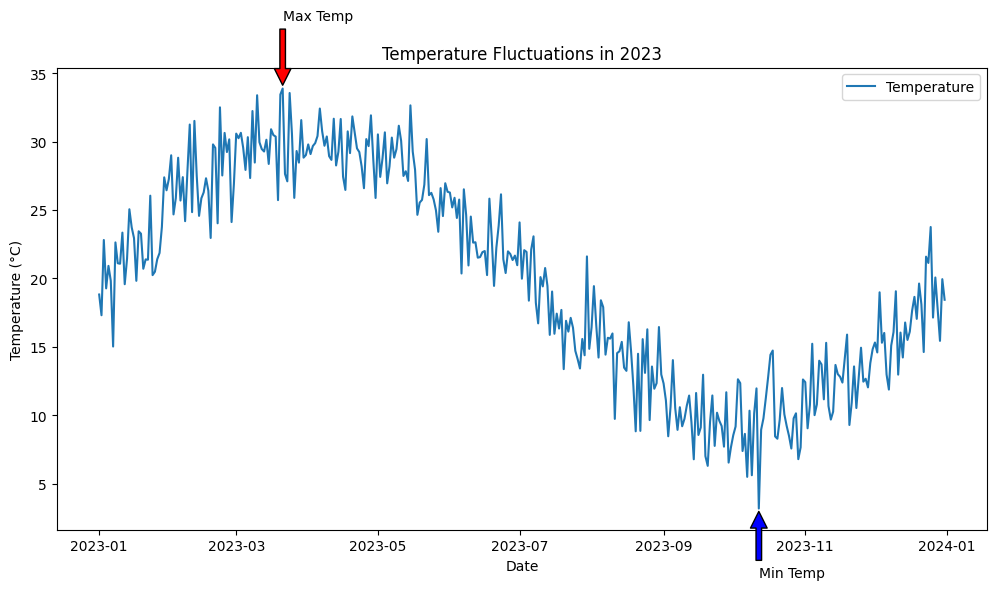

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy library

# Sample data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),
    'Temperature': [20 + 10 * np.sin(2 * np.pi * i / 365) + np.random.normal(0, 2) for i in range(365)]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Temperature'], label='Temperature')
plt.title('Temperature Fluctuations in 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Annotate extreme events
max_temp_idx = df['Temperature'].idxmax()
min_temp_idx = df['Temperature'].idxmin()
plt.annotate('Max Temp', xy=(df['Date'][max_temp_idx], df['Temperature'][max_temp_idx]), xytext=(df['Date'][max_temp_idx], df['Temperature'][max_temp_idx] + 5),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate('Min Temp', xy=(df['Date'][min_temp_idx], df['Temperature'][min_temp_idx]), xytext=(df['Date'][min_temp_idx], df['Temperature'][min_temp_idx] - 5),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.show()

Exercise 2: Hierarchical Filtering and Visualization

Objective

Extract and analyze temperature data for a specific state, city, and date range.

Steps

Load the Dataset: Use a dataset with hierarchical indexing.
Filter Data: Filter data based on user-defined criteria.
Calculate Average Temperature: Compute the average temperature for the selected range.
Visualize Results: Create an appropriate graph (e.g., line or bar chart).


/var/folders/xh/330hhznn65g8ndgfy8rh7gkw0000gn/T/ipykernel_19781/311371824.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Date': pd.date_range(start='2023-01-01', periods=4, freq='M'),


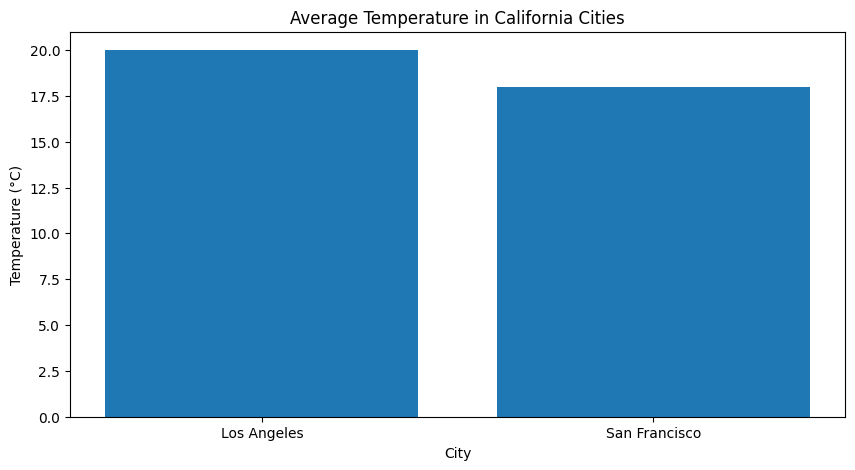

Average Temperature: 19.00°C


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample hierarchical data
data = {
    'Country': ['USA', 'USA', 'USA', 'USA'],
    'State': ['California', 'California', 'New York', 'New York'],
    'City': ['Los Angeles', 'San Francisco', 'New York City', 'Buffalo'],
    'Date': pd.date_range(start='2023-01-01', periods=4, freq='M'),
    'Temperature': [20, 18, 15, 10]
}
df = pd.DataFrame(data)

# Filter data
filtered_df = df[(df['Country'] == 'USA') & (df['State'] == 'California')]

# Calculate average temperature
avg_temp = filtered_df['Temperature'].mean()

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(filtered_df['City'], filtered_df['Temperature'])
plt.title('Average Temperature in California Cities')
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.show()

print(f'Average Temperature: {avg_temp:.2f}°C')

Exercise 3: Dynamic Subplot Configuration with User Interaction

Objective

Create a script that dynamically generates subplots based on user input.

Steps

Prompt User Input: Ask the user to enter the number of plots.
Configure Subplots: Set up subplots in a 3x3 grid layout.
Generate Plots: Create different plot types with random data.
Add Titles and Labels: Enhance each subplot with titles, labels, and legends.

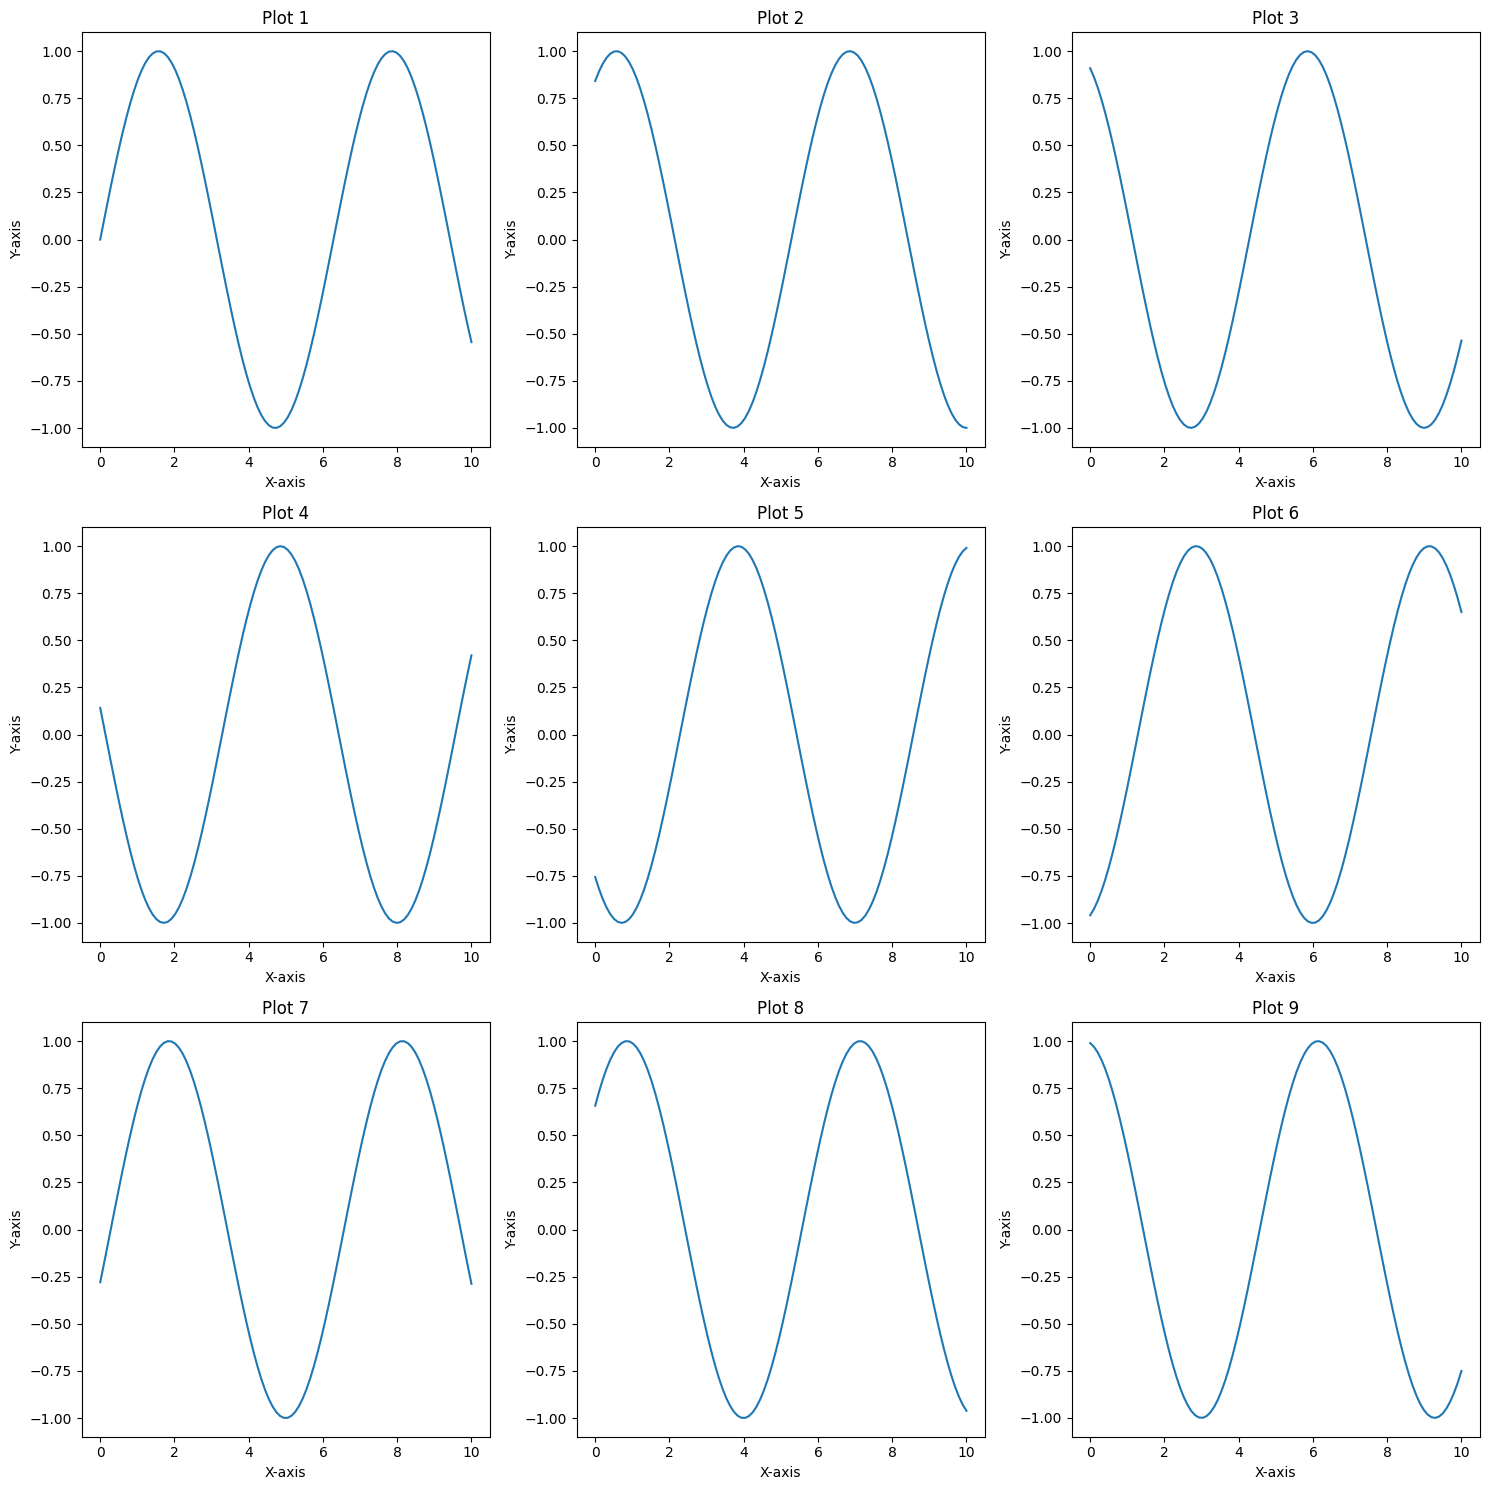

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# User input
num_plots = int(input("Enter the number of plots (up to 9): "))

# Configure subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()

for i in range(num_plots):
    ax = axs[i]
    x = np.linspace(0, 10, 100)
    y = np.sin(x + i)
    ax.plot(x, y)
    ax.set_title(f'Plot {i+1}')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

for j in range(num_plots, 9):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

Exercise 4: Multi-Dimensional Analysis of Wine Characteristics

Objective

Analyze wine prices by country, vintage, and alcohol content using multi-dimensional plots.

Steps

Load the Dataset: Use a dataset of wine characteristics.
Filter Data: Include wines from the top 5 countries by listings.
Group Data: Group by country and vintage, calculating average price and alcohol content.
Visualize Results: Use Seaborn’s FacetGrid to create scatter plots.

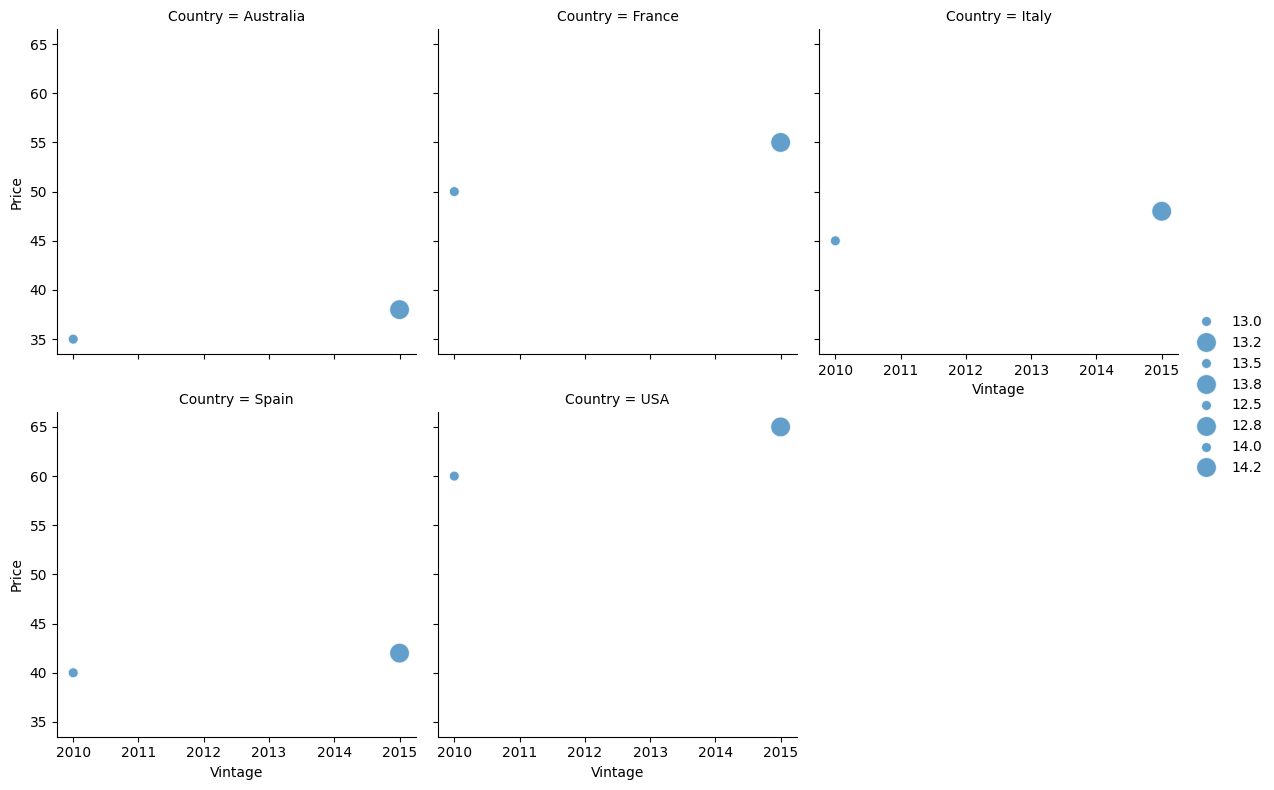

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'Country': ['France', 'Italy', 'Spain', 'USA', 'Australia', 'France', 'Italy', 'Spain', 'USA', 'Australia'],
    'Vintage': [2010, 2010, 2010, 2010, 2010, 2015, 2015, 2015, 2015, 2015],
    'Price': [50, 45, 40, 60, 35, 55, 48, 42, 65, 38],
    'Alcohol': [13.5, 13.0, 12.5, 14.0, 13.0, 13.8, 13.2, 12.8, 14.2, 13.2]
}
df = pd.DataFrame(data)

# Filter data for top countries
top_countries = df['Country'].value_counts().nlargest(5).index
filtered_df = df[df['Country'].isin(top_countries)]

# Group data by Country and Vintage
grouped_df = filtered_df.groupby(['Country', 'Vintage']).mean().reset_index()

# Plotting
g = sns.FacetGrid(grouped_df, col='Country', col_wrap=3, height=4)
g.map_dataframe(sns.scatterplot, x='Vintage', y='Price', size='Alcohol', sizes=(50, 200), alpha=0.7)
g.add_legend()

plt.show()

Exercise 5: Predicting Wine Prices with Machine Learning

Objective

Build a predictive model for wine prices.

Steps

Preprocess the Dataset: Encode categorical variables, handle missing values, normalize.
Split Data: Divide data into training and testing sets.
Train a Regression Model: Use linear regression or random forest.
Evaluate the Model: Use metrics such as RMSE and R².
Visualize Results: Create a scatter plot of predicted vs. actual prices.


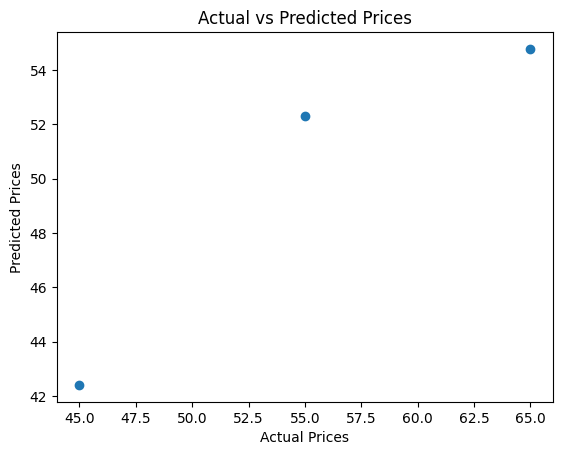

RMSE: 6.28
R²: 0.41


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sample data
data = {
    'Country': ['France', 'Italy', 'Spain', 'USA', 'Australia', 'France', 'Italy', 'Spain', 'USA', 'Australia'],
    'Vintage': [2010, 2010, 2010, 2010, 2010, 2015, 2015, 2015, 2015, 2015],
    'Alcohol': [13.5, 13.0, 12.5, 14.0, 13.0, 13.8, 13.2, 12.8, 14.2, 13.2],
    'Price': [50, 45, 40, 60, 35, 55, 48, 42, 65, 38]
}
df = pd.DataFrame(data)

# Preprocess data
df = pd.get_dummies(df, columns=['Country'])
X = df.drop('Price', axis=1)
y = df['Price']

# Split data with a larger test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

Exercise 6: Clustering Analysis to Identify Similar Wines

Objective

Perform clustering to group wines based on key features.

Steps

Preprocess Data: Handle missing values, normalize features.
Apply Clustering Algorithm: Use K-means or hierarchical clustering.
Determine Optimal Clusters: Use the elbow method or silhouette score.
Visualize Clusters: Use PCA for 2D or 3D plots.
Analyze Clusters: Interpret the characteristics of each cluster.


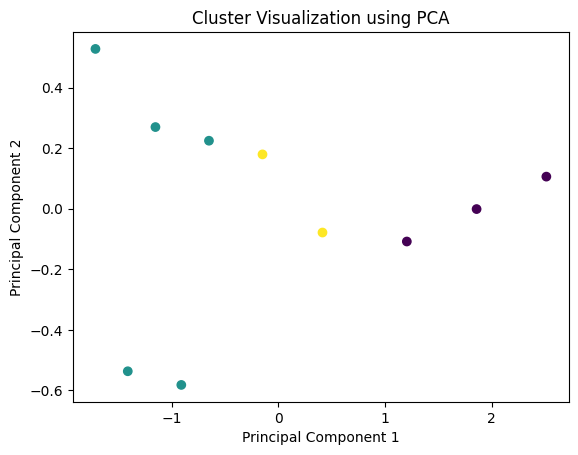

In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample data
data = {
    'Alcohol': [13.5, 13.0, 12.5, 14.0, 13.0, 13.8, 13.2, 12.8, 14.2, 13.2],
    'Price': [50, 45, 40, 60, 35, 55, 48, 42, 65, 38]
}
df = pd.DataFrame(data)

# Preprocess data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization using PCA')
plt.show()